<a href="https://colab.research.google.com/github/videetas/Adj-Closing-Price-Prediction/blob/main/LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from sklearn import metrics
from pylab import rcParams
from sklearn.metrics import r2_score
import math 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
rcParams['figure.figsize'] = 20, 10 

In [ ]:
data1=pd.read_csv('/content/ADDYY.csv')
data2=pd.read_csv('/content/AAPL.csv')
data3=pd.read_csv('/content/TM.csv')

In [ ]:
data1.loc[:, 'Date'] = pd.to_datetime(data1['Date'],format='%Y-%m-%d')
data1['Month'] = data1['Date'].dt.month
data1.sort_values(by='Date', inplace=True, ascending=True)
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,35.889999,36.230000,35.869999,35.869999,31.387390,7000,6
1,2011-06-14,36.599998,36.700001,36.410000,36.509998,31.947405,11000,6
2,2011-06-15,36.360001,36.570000,35.849998,36.200001,31.676157,51000,6
3,2011-06-16,35.470001,35.570000,35.209999,35.360001,30.941120,20400,6
4,2011-06-17,36.500000,36.700001,36.299999,36.500000,31.938662,16800,6


In [ ]:
data2.loc[:, 'Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')
data2['Month'] = data2['Date'].dt.month
data2.sort_values(by='Date', inplace=True, ascending=True)
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,11.685714,11.725357,11.609643,11.664286,10.030155,329473200,6
1,2011-06-14,11.785714,11.901786,11.761071,11.872857,10.209505,334569200,6
2,2011-06-15,11.776786,11.796429,11.602857,11.669643,10.034760,399196000,6
3,2011-06-16,11.675000,11.738571,11.368929,11.612857,9.985929,510591200,6
4,2011-06-17,11.749643,11.758929,11.405714,11.437857,9.835445,615020000,6


In [ ]:
data3.loc[:, 'Date'] = pd.to_datetime(data3['Date'],format='%Y-%m-%d')
data3['Month'] = data3['Date'].dt.month
data3.sort_values(by='Date', inplace=True, ascending=True)
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,80.209999,80.260002,79.400002,79.720001,69.560913,836200,6
1,2011-06-14,80.080002,80.660004,80.040001,80.440002,70.189163,464200,6
2,2011-06-15,79.910004,80.330002,79.279999,79.480003,69.351509,550600,6
3,2011-06-16,79.239998,79.750000,79.029999,79.470001,69.342773,580200,6
4,2011-06-17,79.610001,79.900002,79.370003,79.510002,69.377678,375000,6


# ADIDAS

In [ ]:
num_crossval = int(0.25*len(data1))
num_test = int(0.25*len(data1))
num_train = len(data1) - num_crossval - num_test
data_crossvaltrain = data1[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data1[:num_train][['Date', 'Adj Close']]
data_crossval = data1[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data1[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR ADIDAS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

FOR ADIDAS
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

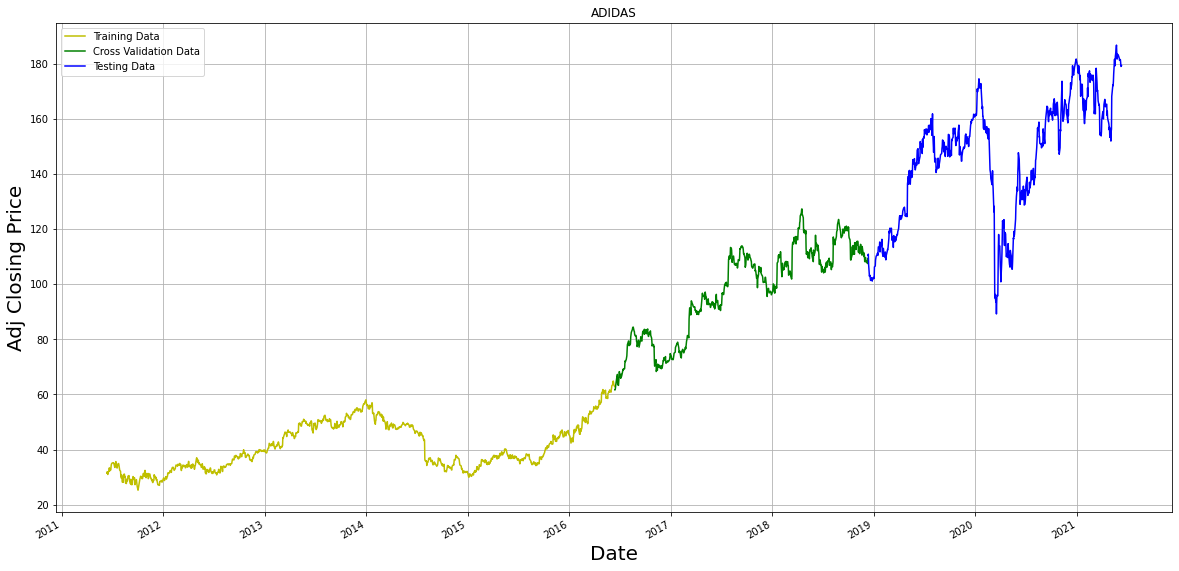

In [ ]:
plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="ADIDAS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
def linregg(data, target, N, predm, offset):
    #function to perform linear regression, train for different values of N and return predicted array.
    
    regobj = LinearRegression(fit_intercept=True)
    pr = []
    for i in range(offset, len(data['Adj Close'])):
        x_train = np.array(range(len(data['Adj Close'][i-N:i]))) 
        y_train = np.array(data['Adj Close'][i-N:i]) 
        y_train = y_train.reshape(-1, 1)
        x_train = x_train.reshape(-1, 1)
        regobj.fit(x_train, y_train)            
        pred = regobj.predict(np.array(N).reshape(1,-1))
        pr.append(pred[0][0])  
    pr = np.array(pr)
    pr[pr < predm] = predm
    return pr


In [ ]:
RMSE = []
R2 = []

#In this for loop we will implement the linear regression function defined above by varying value of N => Number of elements used to predict next value.
for N in range(1, 30): 
    estimate = linregg(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    #print(estimate)
    data_crossval.loc[:, 'est' + '_N' + str(N)] = estimate
    RMSE.append(math.sqrt(mean_squared_error(estimate, data_crossval['Adj Close'])))
    R2.append(r2_score(data_crossval['Adj Close'], estimate))
    
print("FOR ADIDAS")
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))

FOR ADIDAS
RMSE = [1.5531707293181685, 2.1670725629298886, 1.9411896911365185, 1.9342875874321266, 1.9612667468265126, 1.99481889236796, 2.0312197848864177, 2.0637277175630957, 2.109158772702159, 2.184693214489933, 2.2797987545192724, 2.3678007339398657, 2.4438244107516205, 2.510602684814343, 2.5794372992437626, 2.6521790063475112, 2.7227036000486473, 2.792996456792751, 2.8583663651810647, 2.918583300965516, 2.9754828427458415, 3.0340022081043805, 3.091418005156576, 3.1473371310833884, 3.199703737164683, 3.2514915297890705, 3.3063544133875222, 3.361293637378, 3.4193806942628533]
R2 = [0.9909775113353744, 0.9824355377664813, 0.985906336340249, 0.9860063811645248, 0.9856132969257521, 0.9851168487355514, 0.984568725862494, 0.9840708447623329, 0.9833617939724183, 0.982148740223568, 0.9805606842256599, 0.9790309742936305, 0.9776628403870223, 0.976425421949401, 0.9751149853067319, 0.9736916496672003, 0.9722739066189471, 0.9708238004992439, 0.9694420837664364, 0.9681410002159765, 0.9668866704

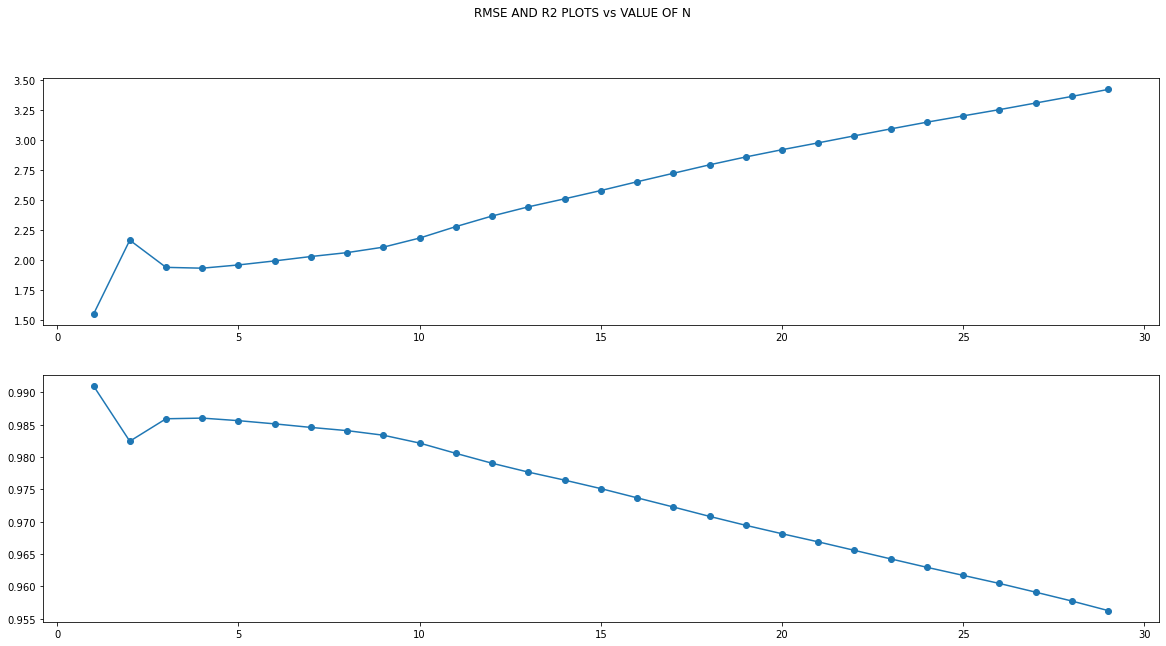

In [ ]:
#plotting root mean square error AND R2 SCORE vs n 
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('RMSE AND R2 PLOTS vs VALUE OF N')
ax1.plot(range(1,30), RMSE,'o-',)
ax2.plot(range(1,30), R2,'o-')

In [ ]:
## From the above graphs , we can see that R2 score can be maximized by setting N=3/5
## RMSE can be minimized by setting N=3/5

Text(0, 0.5, 'Adj Closing Price')

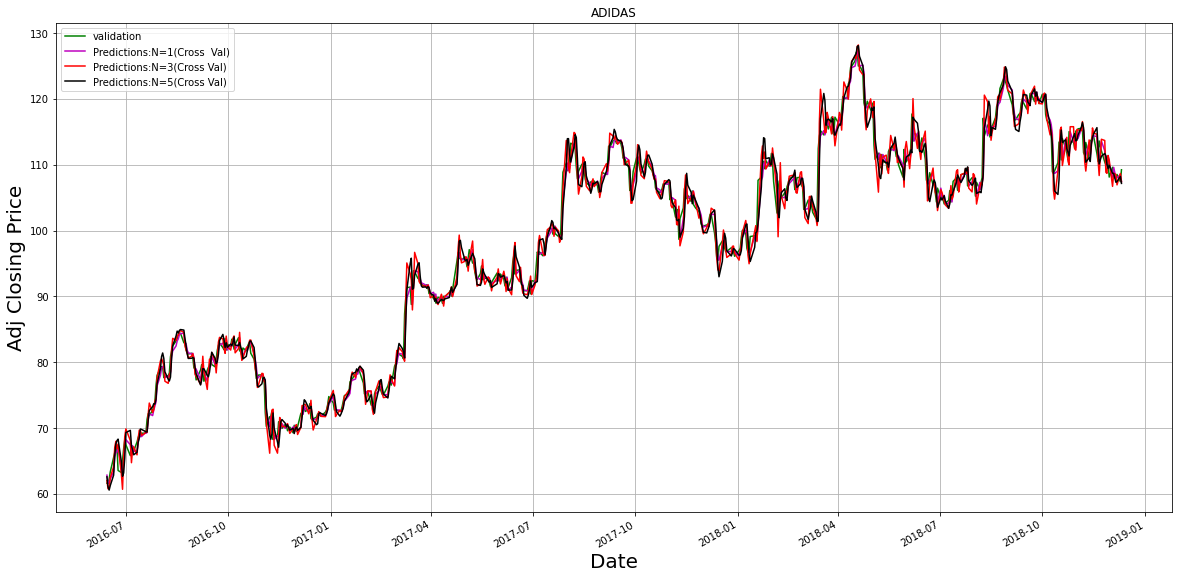

In [ ]:
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, title="ADIDAS")
p = data_crossval.plot(x='Date', y='est_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='est_N3', style='r-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='est_N5', style='k-', grid=True, ax=p)
p.legend([ 'validation', 'Predictions:N=1(Cross  Val)', 'Predictions:N=3(Cross Val)','Predictions:N=5(Cross Val)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
## As we can see, performance for N=3/5 is better than performance of values of N>1

In [ ]:
output = linregg(data1, 'Adj Close', 5, 0, num_train+num_crossval)
data_test.loc[:, 'op' + '_N' + str(5)] = output
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(output, data_test['Adj Close'])))
print("R2 score on test data (N=5)= %0.3f" % r2_score(data_test['Adj Close'], output))
data_test.head()

RMSE = 3.697
R2 score on test data (N=5)= 0.972


,Date,Adj Close,op_N5
1888,2018-12-12,110.472008,108.810677
1889,2018-12-13,110.852913,110.435873
1890,2018-12-14,107.190369,111.607885
1891,2018-12-17,102.844162,109.366409
1892,2018-12-18,103.254364,103.293432


In [ ]:
output = linregg(data1, 'Adj Close', 3, 0, num_train+num_crossval)
data_test.loc[:, 'op' + '_N' + str(3)] = output
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(output, data_test['Adj Close'])))
print("R2 score on test data (N=3) = %0.3f" % r2_score(data_test['Adj Close'], output))
data_test.head()

RMSE = 3.613
R2 score on test data (N=3) = 0.973


,Date,Adj Close,op_N5,op_N3
1888,2018-12-12,110.472008,108.810677,109.127447
1889,2018-12-13,110.852913,110.435873,112.077017
1890,2018-12-14,107.190369,111.607885,111.793780
1891,2018-12-17,102.844162,109.366409,106.223458
1892,2018-12-18,103.254364,103.293432,98.953730


Text(0, 0.5, 'Adj Closing Price')

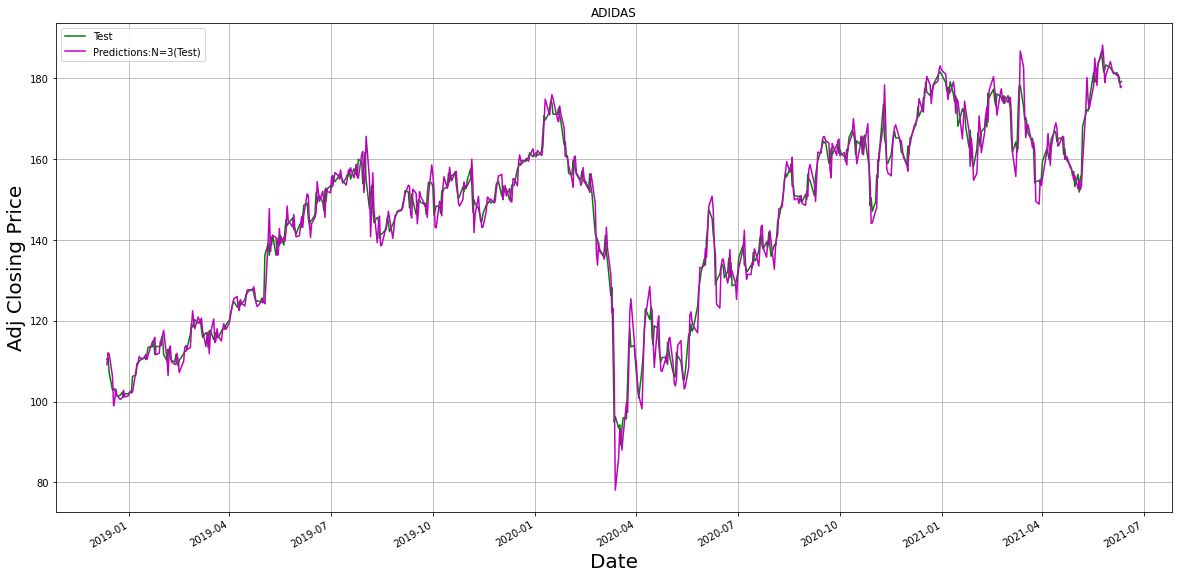

In [ ]:
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=3 AND ACTUAL TEST DATA
p = data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="ADIDAS")
p = data_test.plot(x='Date', y='op_N3', style='m-', grid=True, ax=p)
p.legend([ 'Test',  'Predictions:N=3(Test)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

Text(0, 0.5, 'Adj Closing Price')

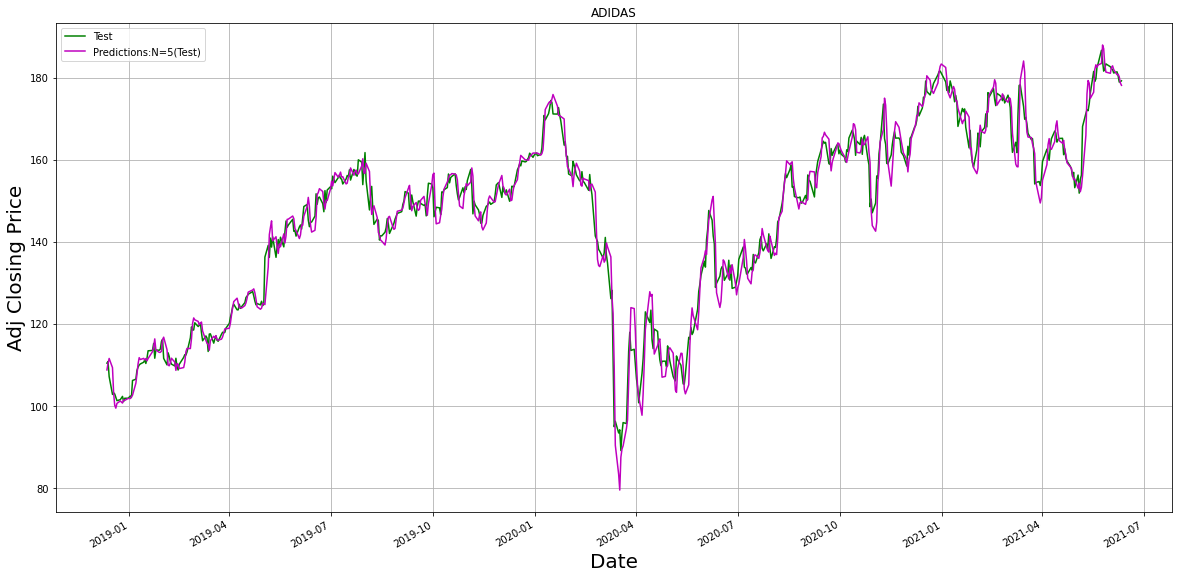

In [ ]:
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=5 AND ACTUAL TEST DATA
p = data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="ADIDAS")
p = data_test.plot(x='Date', y='op_N5', style='m-', grid=True, ax=p)
p.legend([ 'Test',  'Predictions:N=5(Test)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

# APPLE

FOR APPLE
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

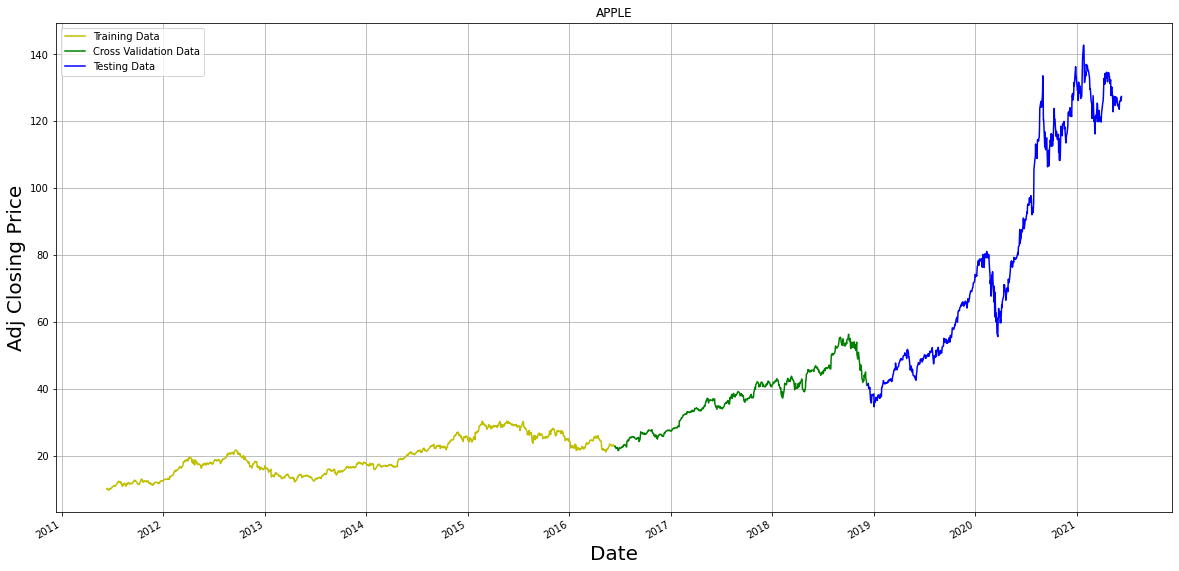

In [ ]:
num_crossval = int(0.25*len(data2))
num_test = int(0.25*len(data2))
num_train = len(data2) - num_crossval - num_test
data_crossvaltrain = data2[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data2[:num_train][['Date', 'Adj Close']]
data_crossval = data2[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data2[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR APPLE")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="APPLE")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
RMSE = []
R2 = []

#In this for loop we will implement the linear regression function defined above by varying value of N => Number of elements used to predict next value.
for N in range(1, 30): 
    estimate = linregg(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    #print(estimate)
    data_crossval.loc[:, 'est' + '_N' + str(N)] = estimate
    RMSE.append(math.sqrt(mean_squared_error(estimate, data_crossval['Adj Close'])))
    R2.append(r2_score(data_crossval['Adj Close'], estimate))
    
print("FOR APPLE")
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))

FOR APPLE
RMSE = [0.5740070094784355, 0.7907716426137998, 0.727721312958671, 0.7296409227971599, 0.7321956106826826, 0.7347758675378039, 0.7454995138202225, 0.7504133429158256, 0.7716701215687711, 0.8029659086129057, 0.8323667723212721, 0.8579652277905863, 0.8822482773706564, 0.9063360470818818, 0.9309169973437906, 0.9584350051686861, 0.9855257148255279, 1.0079809562853523, 1.0256918219061564, 1.0406441591219768, 1.0548400901049162, 1.0667743864918868, 1.0769701405849317, 1.085267837047864, 1.0955587298246097, 1.106922165961846, 1.118807808941379, 1.132321774179406, 1.146021032140533]
R2 = [0.995692328455157, 0.991824574530425, 0.9930762978203692, 0.9930397224553952, 0.9929908971633469, 0.992941409972641, 0.9927338740946788, 0.9926377716286281, 0.9922147679852996, 0.9915704885753449, 0.9909418885494886, 0.9903761784069527, 0.9898237017270748, 0.9892604348666224, 0.9886699947823748, 0.9879902622470778, 0.9873017430449305, 0.986716490093537, 0.986245589700308, 0.9858416484448753, 0.98545

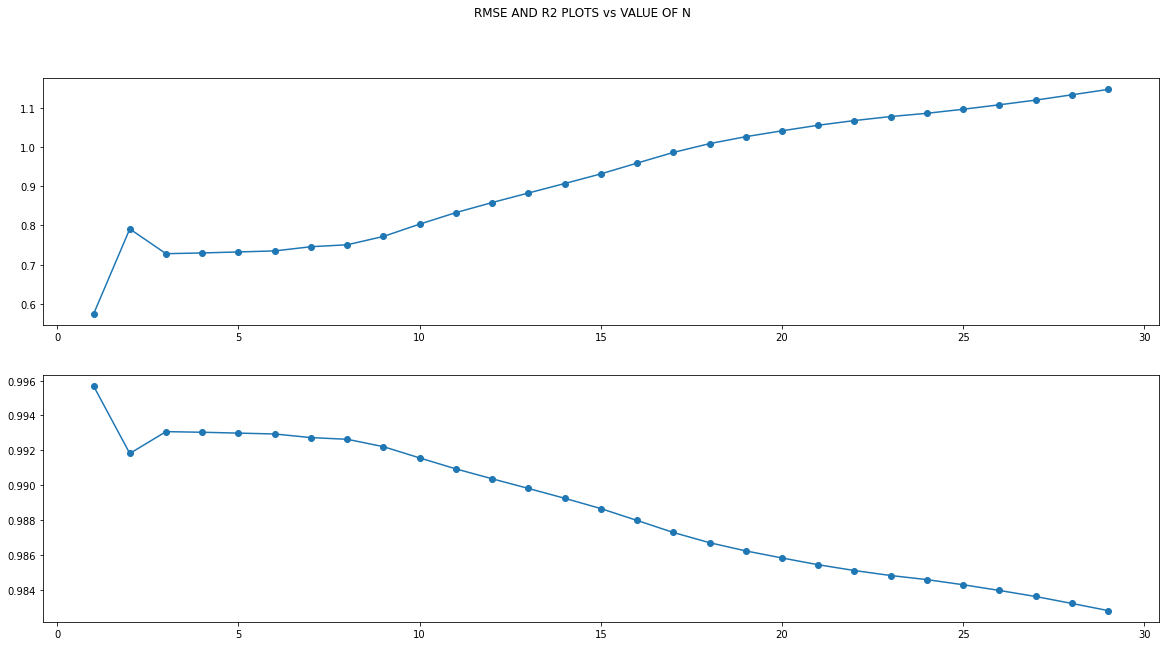

In [ ]:
#plotting root mean square error AND R2 SCORE vs n 
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('RMSE AND R2 PLOTS vs VALUE OF N')
ax1.plot(range(1,30), RMSE,'o-',)
ax2.plot(range(1,30), R2,'o-')

Text(0, 0.5, 'Adj Closing Price')

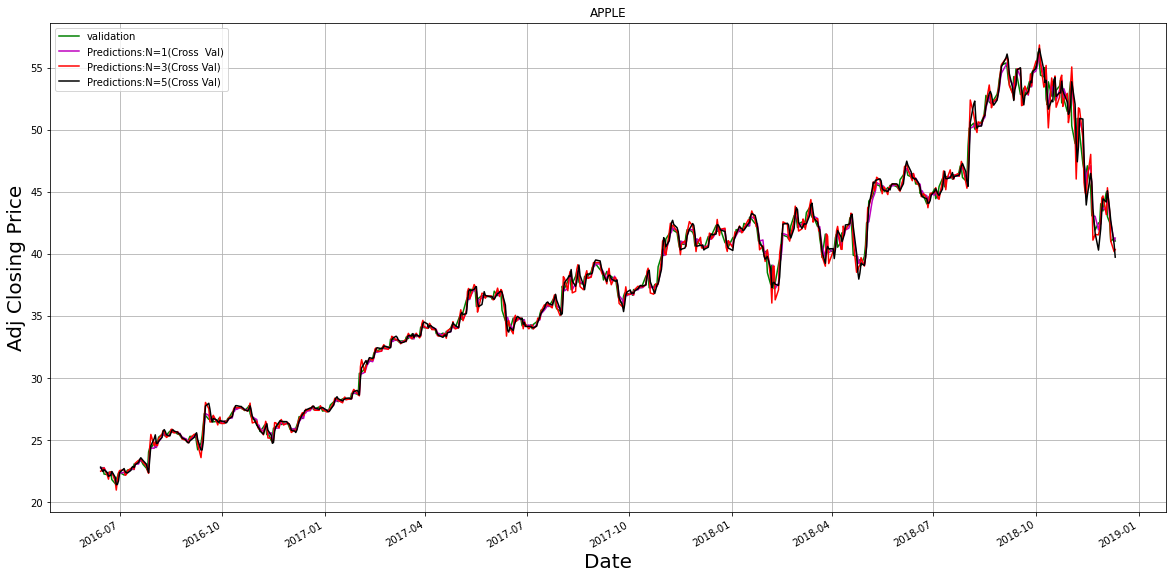

In [ ]:
## As we can see, performance for N=3/5 is better than performance of values of N>1
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, title="APPLE")
p = data_crossval.plot(x='Date', y='est_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='est_N3', style='r-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='est_N5', style='k-', grid=True, ax=p)
p.legend([ 'validation', 'Predictions:N=1(Cross  Val)', 'Predictions:N=3(Cross Val)','Predictions:N=5(Cross Val)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
output = linregg(data2, 'Adj Close', 5, 0, num_train+num_crossval)
data_test.loc[:, 'op' + '_N' + str(5)] = output
print("RMSE(N=5) = %0.3f" % math.sqrt(mean_squared_error(output, data_test['Adj Close'])))
print("R2 score on test data (N=5)= %0.3f" % r2_score(data_test['Adj Close'], output))
output = linregg(data2, 'Adj Close', 3, 0, num_train+num_crossval)
data_test.loc[:, 'op' + '_N' + str(3)] = output
print("RMSE (N=3)= %0.3f" % math.sqrt(mean_squared_error(output, data_test['Adj Close'])))
print("R2 score on test data (N=3) = %0.3f" % r2_score(data_test['Adj Close'], output))


RMSE(N=5) = 2.336
R2 score on test data (N=5)= 0.995
RMSE (N=3)= 2.433
R2 score on test data (N=3) = 0.995


Text(0, 0.5, 'Adj Closing Price')

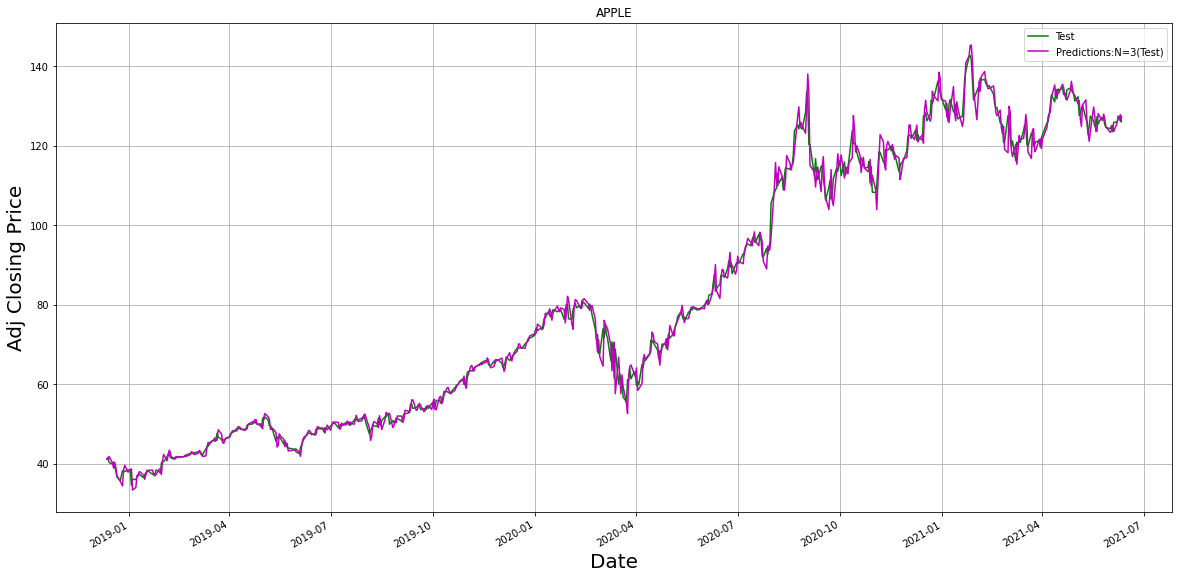

In [ ]:
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=3 AND ACTUAL TEST DATA
p = data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="APPLE")
p = data_test.plot(x='Date', y='op_N3', style='m-', grid=True, ax=p)
p.legend([ 'Test',  'Predictions:N=3(Test)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

Text(0, 0.5, 'Adj Closing Price')

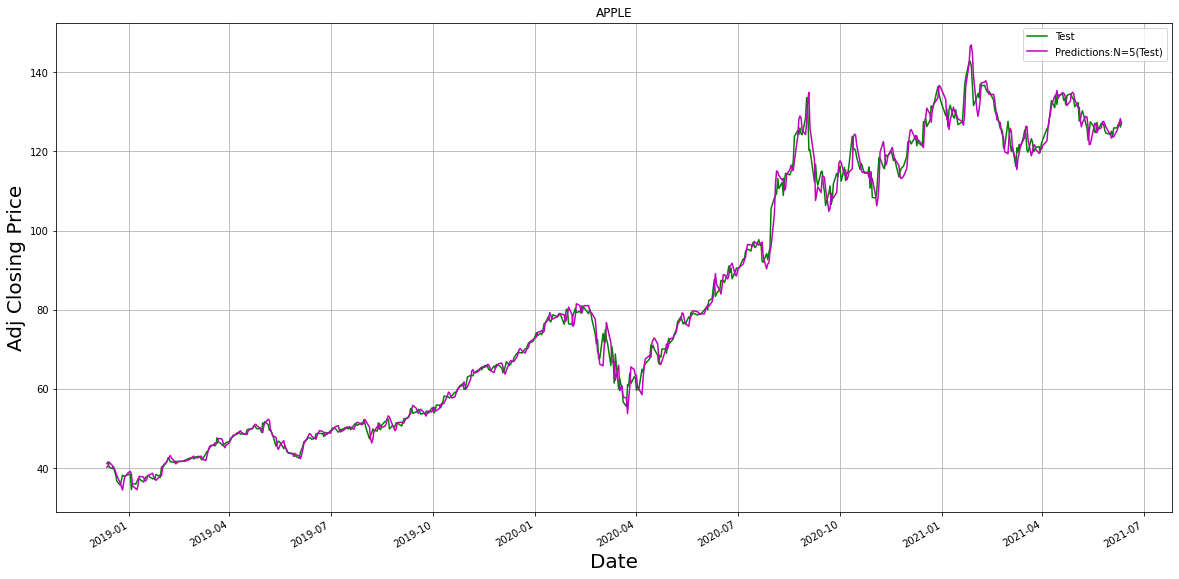

In [ ]:
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=5 AND ACTUAL TEST DATA
p = data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="APPLE")
p = data_test.plot(x='Date', y='op_N5', style='m-', grid=True, ax=p)
p.legend([ 'Test',  'Predictions:N=5(Test)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

# TOYOTA MOTORS

FOR TOYOTA MOTORS
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

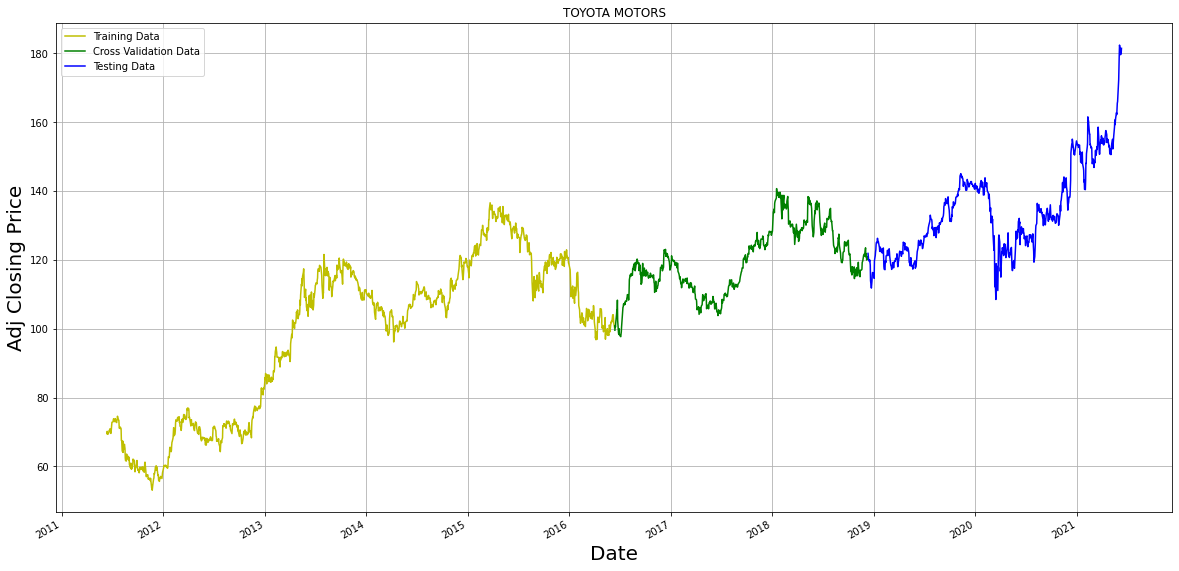

In [ ]:
num_crossval = int(0.25*len(data3))
num_test = int(0.25*len(data3))
num_train = len(data3) - num_crossval - num_test
data_crossvaltrain = data3[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data3[:num_train][['Date', 'Adj Close']]
data_crossval = data3[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data3[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR TOYOTA MOTORS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="TOYOTA MOTORS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
RMSE = []
R2 = []

#In this for loop we will implement the linear regression function defined above by varying value of N => Number of elements used to predict next value.
for N in range(1, 30): 
    estimate = linregg(data_crossvaltrain, 'Adj Close', N, 0, num_train)
    #print(estimate)
    data_crossval.loc[:, 'est' + '_N' + str(N)] = estimate
    RMSE.append(math.sqrt(mean_squared_error(estimate, data_crossval['Adj Close'])))
    R2.append(r2_score(data_crossval['Adj Close'], estimate))
    
print("FOR TOYOTA M")
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))

FOR TOYOTA M
RMSE = [1.2869748970130563, 1.8436063909496065, 1.6309910056261196, 1.5619580561740274, 1.5654325836762086, 1.6137456773581733, 1.6677071412138753, 1.7260027680416026, 1.7894302215414104, 1.8476710095446558, 1.906155441003911, 1.9579719734912893, 2.0074585478188274, 2.0660824875616277, 2.1271334383610445, 2.181424727177647, 2.234977114821264, 2.2804754852741396, 2.3164793537079222, 2.3464811090194737, 2.375260079793448, 2.3976508411876214, 2.420190142637752, 2.442687221480197, 2.4673723008096045, 2.4913058582720127, 2.5152026961053466, 2.5396150885817597, 2.566914747508481]
R2 = [0.9817417175641928, 0.9625323737826817, 0.9706760209073907, 0.9731058078191093, 0.9729860241381865, 0.9712928583009856, 0.9693409039542871, 0.9671600305211552, 0.9647020645358065, 0.9623669811148658, 0.9599468759884324, 0.9577396868292625, 0.955576482690538, 0.9529439918672796, 0.9501219761538675, 0.9475433886075915, 0.9449362315748497, 0.9426714991436882, 0.9408470188692237, 0.939304863369993, 0.

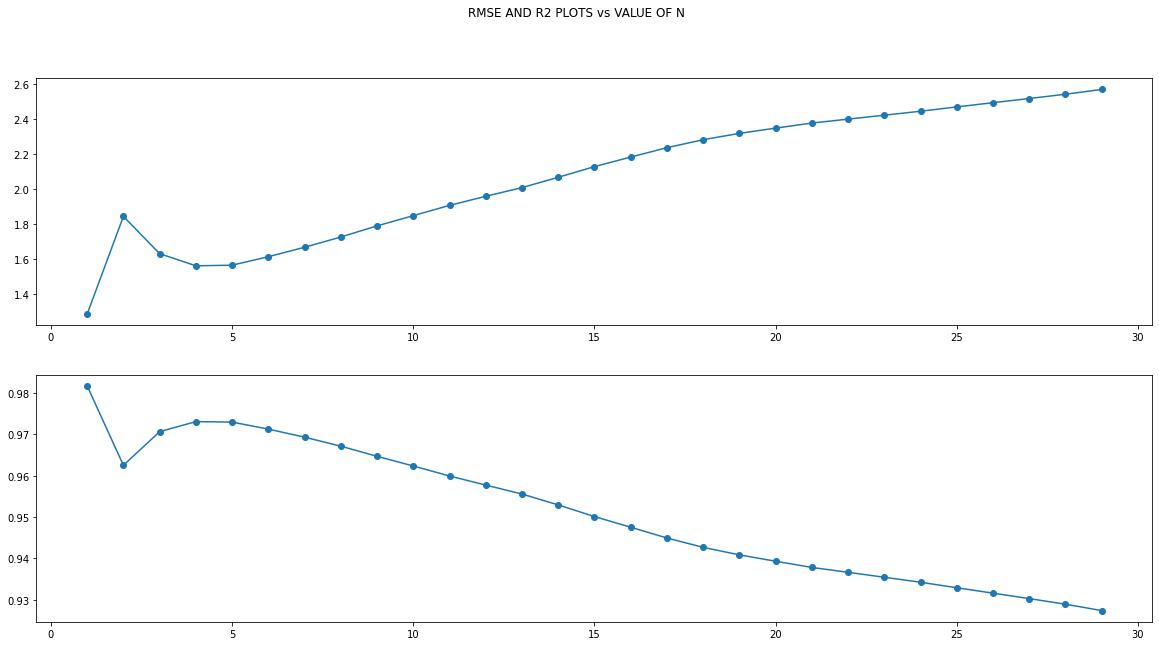

In [ ]:
#plotting root mean square error AND R2 SCORE vs n 
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('RMSE AND R2 PLOTS vs VALUE OF N')
ax1.plot(range(1,30), RMSE,'o-',)
ax2.plot(range(1,30), R2,'o-')

Text(0, 0.5, 'Adj Closing Price')

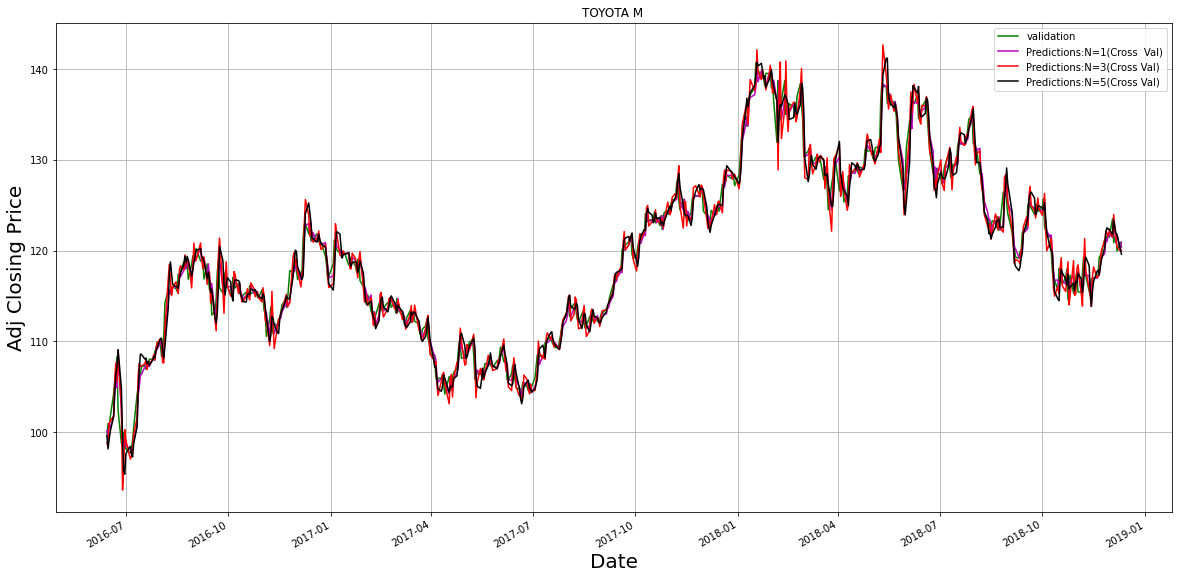

In [ ]:
## As we can see, performance for N=3/5 is better than performance of values of N>1
p = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, title="TOYOTA M ")
p = data_crossval.plot(x='Date', y='est_N1', style='m-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='est_N3', style='r-', grid=True, ax=p)
p = data_crossval.plot(x= 'Date', y='est_N5', style='k-', grid=True, ax=p)
p.legend([ 'validation', 'Predictions:N=1(Cross  Val)', 'Predictions:N=3(Cross Val)','Predictions:N=5(Cross Val)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
output = linregg(data3, 'Adj Close', 5, 0, num_train+num_crossval)
data_test.loc[:, 'op' + '_N' + str(5)] = output
print("RMSE(N=5) = %0.3f" % math.sqrt(mean_squared_error(output, data_test['Adj Close'])))
print("R2 score on test data (N=5)= %0.3f" % r2_score(data_test['Adj Close'], output))
output = linregg(data3, 'Adj Close', 3, 0, num_train+num_crossval)
data_test.loc[:, 'op' + '_N' + str(3)] = output
print("RMSE (N=3)= %0.3f" % math.sqrt(mean_squared_error(output, data_test['Adj Close'])))
print("R2 score on test data (N=3) = %0.3f" % r2_score(data_test['Adj Close'], output))

RMSE(N=5) = 2.304
R2 score on test data (N=5)= 0.969
RMSE (N=3)= 2.161
R2 score on test data (N=3) = 0.973


Text(0, 0.5, 'Adj Closing Price')

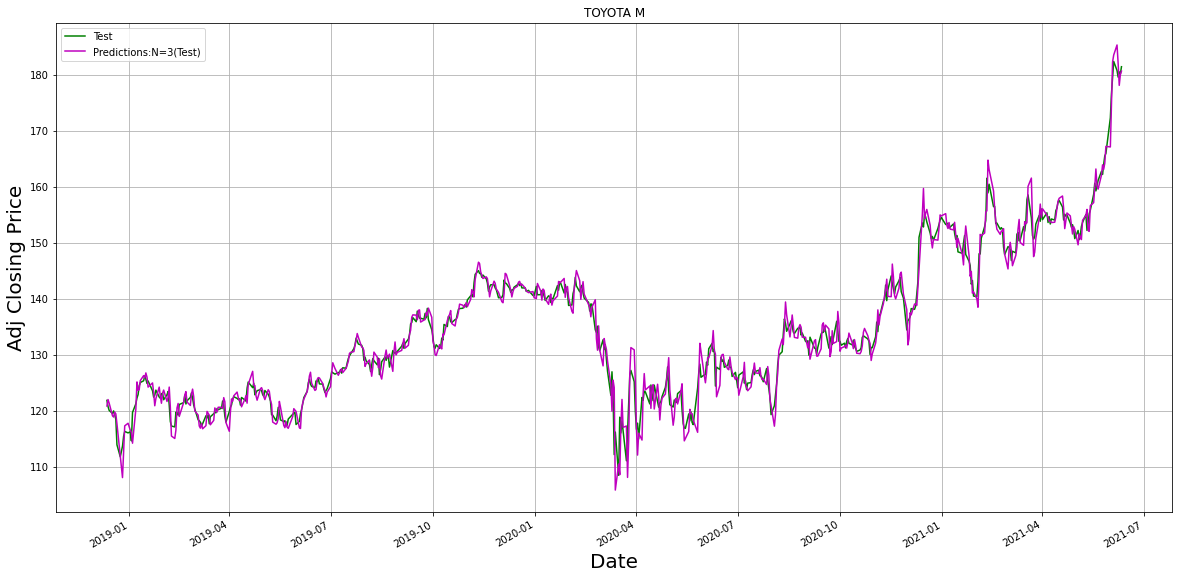

In [ ]:
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=3 AND ACTUAL TEST DATA
p = data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="TOYOTA M")
p = data_test.plot(x='Date', y='op_N3', style='m-', grid=True, ax=p)
p.legend([ 'Test',  'Predictions:N=3(Test)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)

Text(0, 0.5, 'Adj Closing Price')

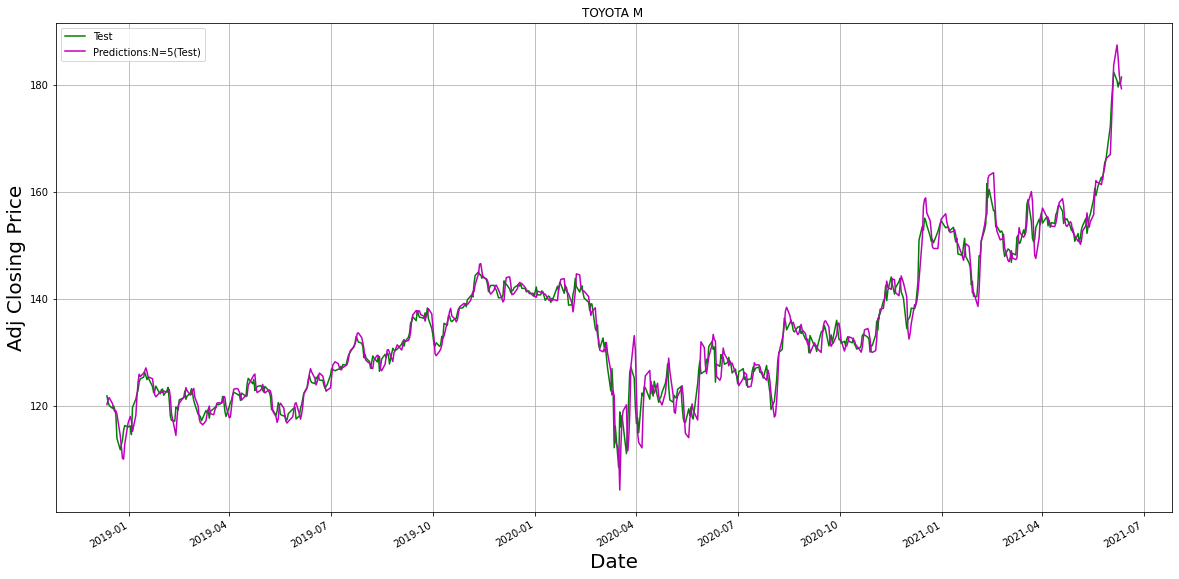

In [ ]:
##ZOOMED PLOT OF TEST PREDICTIONS WITH N=5 AND ACTUAL TEST DATA
p = data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="TOYOTA M ")
p = data_test.plot(x='Date', y='op_N5', style='m-', grid=True, ax=p)
p.legend([ 'Test',  'Predictions:N=5(Test)'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("Adj Closing Price",fontsize=20)